In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Import Dataset
glass = pd.read_csv("C:\Local Disk (A);\Excelr\Assignment Excelr\\13 KNN\glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# EDA

In [3]:
# Check any categorical data is Availabel
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
# Check Any Null Values
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
# 7 Type of Glasses Available in Dataset
glass.Type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

In [7]:
# Correlation Between all elements
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<AxesSubplot:>

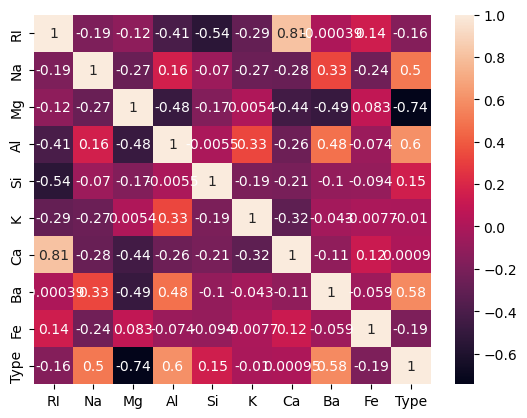

In [8]:
sns.heatmap(glass.corr(), annot=True)

# Preprocessing

In [9]:
# Split Independent and Dependent Variable
X = glass.iloc[:,:9].values
y = glass.iloc[:,[9]].values

In [10]:
X

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [11]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
    

In [12]:
# Split the data into train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [13]:
X_train

array([[ 1.51674, 12.79   ,  3.52   , ...,  7.9    ,  0.     ,  0.     ],
       [ 1.51808, 13.43   ,  2.87   , ...,  9.03   ,  0.     ,  0.     ],
       [ 1.52152, 13.05   ,  3.65   , ...,  9.85   ,  0.     ,  0.17   ],
       ...,
       [ 1.51708, 13.72   ,  3.68   , ...,  7.88   ,  0.     ,  0.     ],
       [ 1.52667, 13.99   ,  3.7    , ...,  9.82   ,  0.     ,  0.1    ],
       [ 1.51321, 13.     ,  0.     , ...,  6.93   ,  0.     ,  0.     ]])

In [14]:
X_test

array([[1.51727e+00, 1.47000e+01, 0.00000e+00, 2.34000e+00, 7.32800e+01,
        0.00000e+00, 8.95000e+00, 6.60000e-01, 0.00000e+00],
       [1.51797e+00, 1.27400e+01, 3.48000e+00, 1.35000e+00, 7.29600e+01,
        6.40000e-01, 8.68000e+00, 0.00000e+00, 0.00000e+00],
       [1.51640e+00, 1.25500e+01, 3.48000e+00, 1.87000e+00, 7.32300e+01,
        6.30000e-01, 8.08000e+00, 0.00000e+00, 9.00000e-02],
       [1.51905e+00, 1.40000e+01, 2.39000e+00, 1.56000e+00, 7.23700e+01,
        0.00000e+00, 9.57000e+00, 0.00000e+00, 0.00000e+00],
       [1.52369e+00, 1.34400e+01, 0.00000e+00, 1.58000e+00, 7.22200e+01,
        3.20000e-01, 1.22400e+01, 0.00000e+00, 0.00000e+00],
       [1.51590e+00, 1.30200e+01, 3.58000e+00, 1.51000e+00, 7.31200e+01,
        6.90000e-01, 7.96000e+00, 0.00000e+00, 0.00000e+00],
       [1.51841e+00, 1.30200e+01, 3.62000e+00, 1.06000e+00, 7.23400e+01,
        6.40000e-01, 9.13000e+00, 0.00000e+00, 1.50000e-01],
       [1.51711e+00, 1.28900e+01, 3.62000e+00, 1.57000e+00, 7.

In [15]:
y_train

array([[2],
       [1],
       [1],
       [1],
       [1],
       [3],
       [3],
       [1],
       [1],
       [2],
       [1],
       [2],
       [3],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [3],
       [2],
       [1],
       [7],
       [1],
       [2],
       [6],
       [3],
       [2],
       [7],
       [3],
       [2],
       [2],
       [1],
       [1],
       [2],
       [7],
       [1],
       [1],
       [3],
       [7],
       [7],
       [2],
       [1],
       [1],
       [1],
       [2],
       [7],
       [1],
       [1],
       [2],
       [2],
       [7],
       [7],
       [7],
       [3],
       [2],
       [1],
       [2],
       [2],
       [5],
       [7],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [1],
       [2],
       [7],
       [1],
       [2],
       [2],
       [2],
       [5],
       [7],
       [1],
    

In [16]:
y_test

array([[7],
       [1],
       [2],
       [6],
       [5],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [3],
       [2],
       [2],
       [7],
       [2],
       [1],
       [3],
       [3],
       [5],
       [2],
       [7],
       [7],
       [2],
       [1],
       [7],
       [1],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [3],
       [1],
       [3],
       [2],
       [7],
       [2],
       [6],
       [2],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [2],
       [7],
       [1]], dtype=int64)

In [17]:
# Feature Scaling for all elements in one scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [18]:
X_train

array([[-0.57016436, -0.8021311 ,  0.59394972, ..., -0.73204433,
        -0.36042422, -0.5574741 ],
       [-0.12738242, -0.01596892,  0.14178098, ...,  0.03745343,
        -0.36042422, -0.5574741 ],
       [ 1.00931153, -0.48275272,  0.68438347, ...,  0.59585004,
        -0.36042422,  1.35466909],
       ...,
       [-0.4578167 ,  0.34026082,  0.70525279, ..., -0.74566376,
        -0.36042422, -0.5574741 ],
       [ 2.7110481 ,  0.67192299,  0.71916568, ...,  0.57542089,
        -0.36042422,  0.56731601],
       [-1.73659739, -0.54417164, -1.85471789, ..., -1.39258666,
        -0.36042422, -0.5574741 ]])

In [19]:
X_test

array([[-2.64486958e-01,  1.72900675e+00, -1.89916963e+00,
         1.98423337e+00,  7.02265592e-01, -1.82347731e+00,
         3.67974623e-02,  8.94255449e-01, -6.83637668e-01],
       [-3.27389976e-02, -6.98023415e-01,  5.13892958e-01,
        -2.96994931e-01,  2.92432784e-01,  6.85255805e-01,
        -1.76950346e-01, -3.34397758e-01, -6.83637668e-01],
       [-5.52516566e-01, -9.33296747e-01,  5.13892958e-01,
         9.01225996e-01,  6.38229216e-01,  6.46056850e-01,
        -6.51945477e-01, -3.34397758e-01,  9.44604741e-02],
       [ 3.24814999e-01,  8.62210263e-01, -2.41922622e-01,
         1.86901982e-01, -4.63196454e-01, -1.82347731e+00,
         5.27625764e-01, -3.34397758e-01, -6.83637668e-01],
       [ 1.86097291e+00,  1.68773073e-01, -1.89916963e+00,
         2.32987402e-01, -6.55305583e-01, -5.69110753e-01,
         2.64135409e+00, -3.34397758e-01, -6.83637668e-01],
       [-7.18050824e-01, -3.51304820e-01,  5.83233837e-01,
         7.16884315e-02,  4.97349188e-01,  8.812505

# KNN Model

In [20]:
# Create KNN Model 
Classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [21]:
Classifier.fit(X_train,y_train)

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [22]:
# Predict the Test Values using KNN Train Model
y_pred = Classifier.predict(X_test)
y_pred

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([7, 1, 2, 6, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 7, 1, 1, 1, 1, 5, 1,
       7, 1, 1, 1, 7, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 7, 2, 7, 2, 1,
       1, 2, 1, 2, 1, 2, 1, 2, 7, 1], dtype=int64)

In [23]:
y_test

array([[7],
       [1],
       [2],
       [6],
       [5],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [3],
       [2],
       [2],
       [7],
       [2],
       [1],
       [3],
       [3],
       [5],
       [2],
       [7],
       [7],
       [2],
       [1],
       [7],
       [1],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [3],
       [1],
       [3],
       [2],
       [7],
       [2],
       [6],
       [2],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [2],
       [7],
       [1]], dtype=int64)

In [24]:
# Check How much Accuracy of our KNN Model
acc = accuracy_score(y_test, y_pred)
acc

0.6851851851851852